In [167]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [168]:
!pip install pyforest
from pyforest import *
import datetime, pickle, copy
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
%matplotlib inline  
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
!pip install quandl
import quandl
plt.style.use('ggplot')
from statistics import variance 
from random import randint
import scipy as sp
from scipy import stats
!pip install ffn
import ffn
!pip install --upgrade pip

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [169]:
# Natural Gas continuous contract
print('\033[4mBrent Crude Futures, Continuous Contract\033[0m')
BC = quandl.get("CHRIS/ICE_B1", authtoken="LSQpgUzwJRoF667ZpzyL") # natural gas continuous contract 1
BC = BC.loc['2010-01-01':,]
BC.sort_index(ascending=True, inplace=True)
BC.tail()

Brent Crude Futures, Continuous Contract


,Open,High,Low,Settle,Change,Wave,Volume,Prev. Day Open Interest,EFP Volume,EFS Volume,Block Volume
Date,,,,,,,,,,,
2021-03-15,69.08,70.03,67.82,68.88,-0.34,68.84,258336.0,428150.0,600.0,NaN,3659.0
2021-03-16,68.81,68.94,67.36,68.39,-0.49,68.07,245273.0,409207.0,1200.0,NaN,2520.0
2021-03-17,68.39,68.89,66.96,68.00,-0.39,67.82,304547.0,402603.0,3000.0,NaN,2209.0
2021-03-18,67.77,68.15,61.45,63.28,-4.72,65.25,509041.0,385091.0,2400.0,NaN,4642.0
2021-03-19,62.99,64.95,62.07,64.53,1.25,63.48,441967.0,323686.0,237.0,NaN,3910.0


In [170]:
print(BC.columns); print(BC.shape)

Index(['Open', 'High', 'Low', 'Settle', 'Change', 'Wave', 'Volume', 'Prev. Day Open Interest', 'EFP Volume', 'EFS Volume', 'Block Volume'], dtype='object')
(2895, 11)


Open                         24
High                         24
Low                          24
Settle                       24
Change                       54
Wave                       1511
Volume                       25
Prev. Day Open Interest       1
EFP Volume                  432
EFS Volume                 1782
Block Volume                 61
dtype: int64


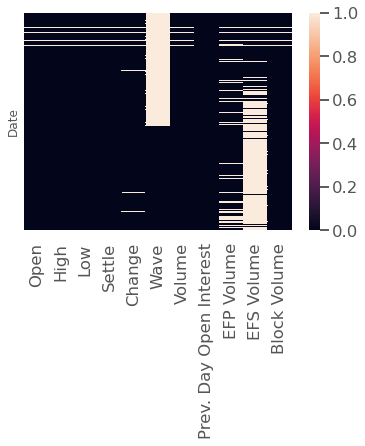

In [171]:
import seaborn as sns
%matplotlib inline
print(BC.isnull().sum())
sns.heatmap(BC.isnull(), yticklabels = False)
plt.show()

In [172]:
BC.drop(['EFP Volume','EFS Volume','Block Volume',
        'Change', 'Wave'],axis=1, inplace=True)
print(BC.columns)
print('\n')
BC= BC.fillna(method='ffill')
print(BC.isnull().sum())

Index(['Open', 'High', 'Low', 'Settle', 'Volume', 'Prev. Day Open Interest'], dtype='object')


Open                       0
High                       0
Low                        0
Settle                     0
Volume                     0
Prev. Day Open Interest    0
dtype: int64


In [173]:
BC.tail()

,Open,High,Low,Settle,Volume,Prev. Day Open Interest
Date,,,,,,
2021-03-15,69.08,70.03,67.82,68.88,258336.0,428150.0
2021-03-16,68.81,68.94,67.36,68.39,245273.0,409207.0
2021-03-17,68.39,68.89,66.96,68.00,304547.0,402603.0
2021-03-18,67.77,68.15,61.45,63.28,509041.0,385091.0
2021-03-19,62.99,64.95,62.07,64.53,441967.0,323686.0


In [174]:
BC.describe()

,Open,High,Low,Settle,Volume,Prev. Day Open Interest
count,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000
mean,76.381551,77.316739,75.395893,76.388238,213551.528152,278960.546114
std,26.669618,26.736489,26.593451,26.711405,90689.912591,143996.432409
min,19.900000,21.290000,15.980000,19.330000,9974.000000,0.000000
25%,54.075000,54.720000,53.030000,53.935000,158802.000000,174495.500000
50%,70.820000,71.600000,69.680000,70.540000,208936.000000,256528.000000
75%,106.595000,107.670000,105.590000,106.680000,268737.500000,374654.000000
max,126.580000,128.400000,125.000000,126.650000,773838.000000,693406.000000


In [175]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Ohlc(x=BC.index,
                open=BC['Open'],
                high=BC['High'],
                low=BC['Low'],
                close=BC['Settle']))

fig.update_layout(
    title='Brent Crude Futures, Continuous Contract',
    yaxis_title='Price (USD)'
)
fig.show()

In [176]:
# Calculate the daily percentage change which is daily return
data = BC["2018":].copy()

print('\033[1m' + 'Daily percentage change:' + '\033[1m')
daily_ret = data['Settle'].pct_change().dropna()
mean_return = daily_ret.mean()
return_stdev = daily_ret.std()
print('Average daily return : %1.2f%% ' % round((mean_return*100),2))
print('Average Volatility : %1.2f%% ' % round((return_stdev*100), 2))

Daily percentage change:
Average daily return : 0.04% 
Average Volatility : 2.97% 


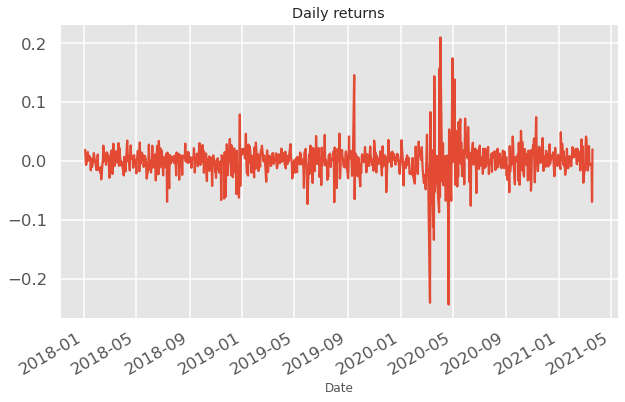

In [177]:
daily_ret.plot(figsize=(10,6),grid=True)
plt.title('Daily returns')
plt.show()

Critical Values


<IPython.core.display.Javascript object>

t test statistic:  0.4


P-value is:  0.7


Critical value at α = 0.01 with 251 df:  925.6




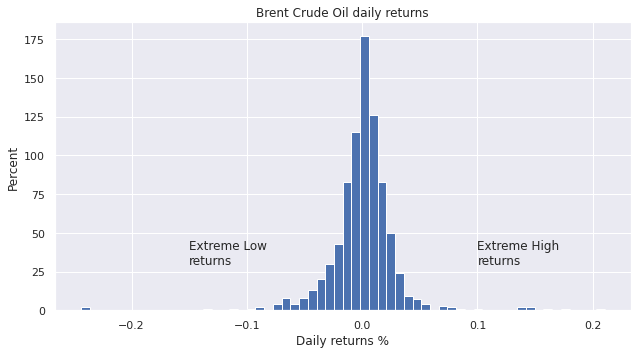



Skewness :  -0.33
Kurtosis :  18.36


In [178]:
print('\033[4mCritical Values\033[0m')
n = len(daily_ret)
test_statistic = ((daily_ret.mean() - 0) / (daily_ret.std()/np.sqrt(n)))
print ('t test statistic: ', round(test_statistic,2))
print('\n')

from scipy.stats import t
p_val = 2 * (1 - t.cdf(test_statistic, n - 1))
print ('P-value is: ', round(p_val,1))
print('\n')

from scipy.stats import chi2
# Here we calculate the critical value directly because our df is too high for most chisquare tables
crit_value = chi2.ppf(0.99, (n - 1))
print ('Critical value at α = 0.01 with 251 df: ', round(crit_value,2))
print('\n')

# Plot the distributions
fig = plt.figure(figsize=(10,5))
sns.set(rc={'figure.figsize': (15,5)})
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
daily_ret.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Brent Crude Oil daily returns")
ax1.text(-0.15,30,"Extreme Low\nreturns")
ax1.text(0.10,30,"Extreme High\nreturns")
plt.show()
print('\n')
print("Skewness : ", round(daily_ret.skew(),2))
print("Kurtosis : ", round(daily_ret.kurtosis(),2))

In [179]:
print('\033[4mProbability of +/-(1%); +/-(3%); +/-%(5) change in price (Data -> 2018- till date)\033[0m')

print ("The probability of price changes between 1%% and -1%% is %1.2f%% " % 
       (100*daily_ret[(daily_ret > -0.01) & (daily_ret < 0.01)].shape[0] / daily_ret.shape[0]))
print ("The probability of price changes between 3%% and -3%% is %1.2f%% " % 
       (100*daily_ret[(daily_ret > -0.03) & (daily_ret < 0.03)].shape[0] / daily_ret.shape[0]))
print ("The probability of price changes between 5%% and -5%% is %1.2f%% " % 
       (100*daily_ret[(daily_ret > -0.05) & (daily_ret < 0.05)].shape[0] / daily_ret.shape[0]))
print ("The probability of price changes more than 5%% is %1.2f%%" % 
       (100*daily_ret[daily_ret > 0.05].shape[0] / daily_ret.shape[0]))
print ("The probability of price changes less than -5%% is %1.2f%%" % 
       (100*daily_ret[daily_ret < -0.05].shape[0] / daily_ret.shape[0]))

Probability of +/-(1%); +/-(3%); +/-%(5) change in price (Data -> 2018- till date)
The probability of price changes between 1% and -1% is 46.08% 
The probability of price changes between 3% and -3% is 85.40% 
The probability of price changes between 5% and -5% is 94.21% 
The probability of price changes more than 5% is 2.17%
The probability of price changes less than -5% is 3.62%


In [180]:
print('\033[4mMinimum price [2018- till date]\033[0m')
print(round(data['Settle'].min(),2), data['Settle'].idxmin());
print('\033[4mMaximum price [2018- till date]\033[0m')
print(round(data['Settle'].max(),2), data['Settle'].idxmax());
print('\n')

print('\033[4mMinimum daily % return [2018- till date]\033[0m')
print(round(daily_ret.min(),2)*100, daily_ret.idxmin()); 
print('\033[4mMaximum daily % return [2018- till date]\033[0m')
print(round(daily_ret.max()*100, 2), daily_ret.idxmax());

Minimum price [2018- till date]
19.33 2020-04-21 00:00:00
Maximum price [2018- till date]
86.29 2018-10-03 00:00:00


Minimum daily % return [2018- till date]
-24.0 2020-04-21 00:00:00
Maximum daily % return [2018- till date]
21.02 2020-04-02 00:00:00


In [181]:
# Get the number of days
days = (data.index[-1] - data.index[0]).days

# Calculate the CAGR 
cagr = ((((data['Settle'][-1]) / data['Settle'][1])) ** (252.0/days)) - 1

# Print the CAGR
print('CAGR:',round(cagr*100))

CAGR: -1.0


In [182]:
perf = BC['Settle'].calc_stats()
print('\n')
perf.display()



Stats for Settle from 2010-01-04 00:00:00 - 2021-03-19 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-19.46%             0.13  -1.91%  -84.74%

Annualized Returns:
mtd    3m      6m      ytd     1y       3y      5y     10y     incep.
-----  ------  ------  ------  -------  ------  -----  ------  --------
0.17%  23.48%  49.55%  24.58%  126.66%  -0.77%  9.22%  -5.61%  -1.91%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.13     0.15       0.03
mean    4.59%    5.30%      0.87%
vol     35.88%   34.41%     29.59%
skew    -0.07    -0.26      -0.08
kurt    17.49    5.39       -0.44
best    21.02%   42.90%     52.41%
worst   -24.40%  -46.95%    -48.26%

Drawdowns:
max      avg       # days
-------  ------  --------
-84.74%  -8.24%    211.53

Misc:
---------------  ------
avg. up month    6.42%
avg. down month  -7.89%
up year %        54.55

In [183]:
perf.stats

start                    2010-01-04 00:00:00
end                      2021-03-19 00:00:00
rf                                         0
total_return                       -0.194583
cagr                                -0.01913
max_drawdown                       -0.847375
calmar                            -0.0225756
mtd                               0.00170754
three_month                         0.234788
six_month                           0.495481
ytd                                 0.245753
one_year                              1.2666
three_year                       -0.00772881
five_year                          0.0922102
ten_year                          -0.0561322
incep                               -0.01913
daily_sharpe                           0.128
daily_sortino                       0.204487
daily_mean                         0.0459323
daily_vol                           0.358847
daily_skew                        -0.0735683
daily_kurt                           17.4862
best_day  

In [234]:
qq = BC['2015':].copy()
qq = qq[['Open', 'High', 'Low', 'Settle', 'Volume']]
print(qq)

             Open   High    Low  Settle    Volume
Date                                             
2015-01-02  58.02  58.54  55.48   56.42  173740.0
2015-01-05  56.25  56.30  52.66   53.11  284892.0
2015-01-06  53.20  53.60  50.52   51.10  331869.0
2015-01-07  51.15  51.84  49.66   51.15  304199.0
2015-01-08  51.06  51.91  49.81   50.96  238964.0
...           ...    ...    ...     ...       ...
2021-03-15  69.08  70.03  67.82   68.88  258336.0
2021-03-16  68.81  68.94  67.36   68.39  245273.0
2021-03-17  68.39  68.89  66.96   68.00  304547.0
2021-03-18  67.77  68.15  61.45   63.28  509041.0
2021-03-19  62.99  64.95  62.07   64.53  441967.0

[1604 rows x 5 columns]


In [235]:
qq['h_o'] = (BC['High']- BC['Open']) # distance between Highest and Opening price
qq['l_o'] = (BC['Low'] - BC['Open']) # distance between Lowest and Opening price
qq['gain'] = (BC['Settle']- BC['Open'])
qq['dailyChange'] = (qq['Settle'] - qq['Open']) / qq['Open']
qq['closeReturn'] = BC['Settle'].pct_change()
qq['priceDirection'] = (qq['Settle'].shift(-1) - qq['Settle'])


# lags = 3
# Create the shifted lag series of prior trading period close values
# for i in range(0, lags):
    # qq["Lag%s" % str(i+1)] = BC["Settle"].shift(i+1).pct_change()
    
# qq['HL'] = (BC['High'] - BC['Settle']) / BC['Settle'] 
# creating more features
qq['volIncrement'] = BC.Volume.diff() / BC.Volume
# qq['pdoi'] = BC['Prev. Day Open Interest'].pct_change()
# qq = qq.replace([np.inf, -np.inf], np.nan)
qq = qq.dropna()
qq.head()

,Open,High,Low,Settle,Volume,h_o,l_o,gain,dailyChange,closeReturn,priceDirection,volIncrement
Date,,,,,,,,,,,,
2015-01-02,58.02,58.54,55.48,56.42,173740.0,0.52,-2.54,-1.60,-0.027577,-0.015873,-3.31,0.168649
2015-01-05,56.25,56.30,52.66,53.11,284892.0,0.05,-3.59,-3.14,-0.055822,-0.058667,-2.01,0.390155
2015-01-06,53.20,53.60,50.52,51.10,331869.0,0.40,-2.68,-2.10,-0.039474,-0.037846,0.05,0.141553
2015-01-07,51.15,51.84,49.66,51.15,304199.0,0.69,-1.49,0.00,0.000000,0.000978,-0.19,-0.090960
2015-01-08,51.06,51.91,49.81,50.96,238964.0,0.85,-1.25,-0.10,-0.001958,-0.003715,-0.85,-0.272991


In [236]:
qq.tail()

,Open,High,Low,Settle,Volume,h_o,l_o,gain,dailyChange,closeReturn,priceDirection,volIncrement
Date,,,,,,,,,,,,
2021-03-12,69.59,69.90,69.03,69.22,248439.0,0.31,-0.56,-0.37,-0.005317,-0.005888,-0.34,-0.160764
2021-03-15,69.08,70.03,67.82,68.88,258336.0,0.95,-1.26,-0.20,-0.002895,-0.004912,-0.49,0.038311
2021-03-16,68.81,68.94,67.36,68.39,245273.0,0.13,-1.45,-0.42,-0.006104,-0.007114,-0.39,-0.053259
2021-03-17,68.39,68.89,66.96,68.00,304547.0,0.50,-1.43,-0.39,-0.005703,-0.005703,-4.72,0.194630
2021-03-18,67.77,68.15,61.45,63.28,509041.0,0.38,-6.32,-4.49,-0.066254,-0.069412,1.25,0.401724


In [237]:
print(qq.shape)

(1603, 12)


In [238]:
# positive value = 1, otherwise, 0
qq.loc[:,"target"] = np.where(qq['priceDirection']> 0, 1.0, 0.0)
qq.drop(['priceDirection'],1, inplace=True)
qq.head()

<IPython.core.display.Javascript object>

,Open,High,Low,Settle,Volume,h_o,l_o,gain,dailyChange,closeReturn,volIncrement,target
Date,,,,,,,,,,,,
2015-01-02,58.02,58.54,55.48,56.42,173740.0,0.52,-2.54,-1.60,-0.027577,-0.015873,0.168649,0.0
2015-01-05,56.25,56.30,52.66,53.11,284892.0,0.05,-3.59,-3.14,-0.055822,-0.058667,0.390155,0.0
2015-01-06,53.20,53.60,50.52,51.10,331869.0,0.40,-2.68,-2.10,-0.039474,-0.037846,0.141553,1.0
2015-01-07,51.15,51.84,49.66,51.15,304199.0,0.69,-1.49,0.00,0.000000,0.000978,-0.090960,0.0
2015-01-08,51.06,51.91,49.81,50.96,238964.0,0.85,-1.25,-0.10,-0.001958,-0.003715,-0.272991,0.0


In [239]:
qq.tail()

,Open,High,Low,Settle,Volume,h_o,l_o,gain,dailyChange,closeReturn,volIncrement,target
Date,,,,,,,,,,,,
2021-03-12,69.59,69.90,69.03,69.22,248439.0,0.31,-0.56,-0.37,-0.005317,-0.005888,-0.160764,0.0
2021-03-15,69.08,70.03,67.82,68.88,258336.0,0.95,-1.26,-0.20,-0.002895,-0.004912,0.038311,0.0
2021-03-16,68.81,68.94,67.36,68.39,245273.0,0.13,-1.45,-0.42,-0.006104,-0.007114,-0.053259,0.0
2021-03-17,68.39,68.89,66.96,68.00,304547.0,0.50,-1.43,-0.39,-0.005703,-0.005703,0.194630,0.0
2021-03-18,67.77,68.15,61.45,63.28,509041.0,0.38,-6.32,-4.49,-0.066254,-0.069412,0.401724,1.0


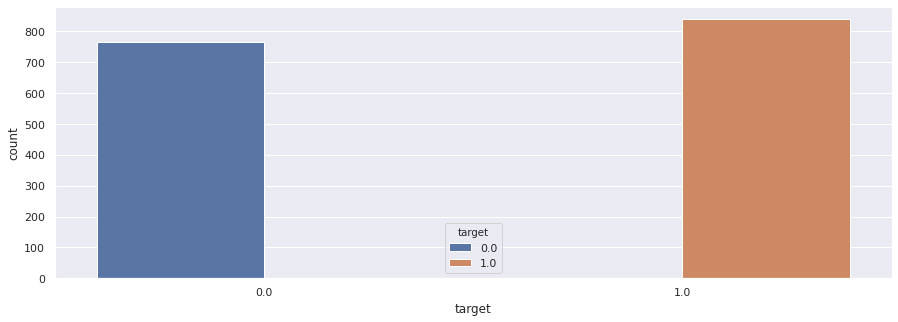

In [240]:
import seaborn as sns
sns.countplot(x = 'target', data=qq, hue='target')
plt.show()

In [241]:
import matplotlib
matplotlib.use('Agg')

X = qq.drop(columns= ['target', 'High',
                     'Open', 'Low', 'Settle',
                     'Volume','target'], axis=1)
y = qq.target.astype(np.integer) 

<IPython.core.display.Javascript object>

In [242]:
X.tail()

,h_o,l_o,gain,dailyChange,closeReturn,volIncrement
Date,,,,,,
2021-03-12,0.31,-0.56,-0.37,-0.005317,-0.005888,-0.160764
2021-03-15,0.95,-1.26,-0.20,-0.002895,-0.004912,0.038311
2021-03-16,0.13,-1.45,-0.42,-0.006104,-0.007114,-0.053259
2021-03-17,0.50,-1.43,-0.39,-0.005703,-0.005703,0.194630
2021-03-18,0.38,-6.32,-4.49,-0.066254,-0.069412,0.401724


In [193]:
pip install tscv

Note: you may need to restart the kernel to use updated packages.


In [243]:
from tscv import GapKFold

# # Create training and test sets
gkcv = GapKFold(n_splits=5, gap_before=2, gap_after=1)

"""
Introduced gaps between the training and test set to mitigate the temporal dependence.
Here the split function splits the data into Kfolds. 
The test sets are untouched, while the training sets get the gaps removed
"""

for tr_index, te_index in gkcv.split(X, y):
    xTrain, xTest = X.values[tr_index], X.values[te_index];
    yTrain, yTest = y.values[tr_index], y.values[te_index];
        
print('Observations: %d' % (len(xTrain) + len(xTest)))
print('Training Observations: %d' % (len(xTrain)))
print('Testing Observations: %d' % (len(xTest)))

Observations: 1601
Training Observations: 1281
Testing Observations: 320


In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [244]:
xgb = XGBClassifier()
logreg2 = LogisticRegression(solver='lbfgs')
knn = KNeighborsClassifier(5)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
lsvc = LinearSVC()
rsvm = SVC(C=1000000.0, cache_size=200, class_weight=None,
                       coef0=0.0, degree=3, gamma=0.0001, kernel='rbf',
                       max_iter=-1, probability=False, random_state=None,
                       shrinking=True, tol=0.001, verbose=False)
rfc = RandomForestClassifier(
              n_estimators=1000, criterion='gini',
              max_depth=None, min_samples_split=2,
              min_samples_leaf=1, max_features='auto',
              bootstrap=True, oob_score=False, n_jobs=1,
              random_state=None, verbose=0)

# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('XGB', XGBClassifier()))
models.append(('LR', LogisticRegression(solver='lbfgs',penalty='l2',random_state = 0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('RF', RandomForestClassifier(
              n_estimators=1000, criterion='gini',
              max_depth=None, min_samples_split=2,
              min_samples_leaf=1, max_features='auto',
              bootstrap=True, oob_score=False, n_jobs=1,
              random_state=None, verbose=0)))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('LSVC', LinearSVC()))
models.append(('RSVM', SVC(C=1000000.0, cache_size=200, class_weight=None,
                       coef0=0.0, degree=3, gamma=0.0001, kernel='rbf',
                       max_iter=-1, probability=False, random_state=None,
                       shrinking=True, tol=0.001, verbose=False)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, xTrain, yTrain, cv=gkcv, 
                                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGB: 0.506639 (0.023163)
LR: 0.535542 (0.022796)
KNN: 0.516795 (0.038544)
LDA: 0.543358 (0.025270)
RF: 0.498845 (0.030637)
QDA: 0.517607 (0.031733)


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LSVC: 0.535545 (0.025269)
RSVM: 0.543367 (0.032586)


In [245]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

LR = LogisticRegression(solver='lbfgs',penalty='l2',random_state = 0)
LDA = LinearDiscriminantAnalysis()

ensembleModel = VotingClassifier(
    estimators=[
                ('LDA', LDA), 
                ('LR', LR)
                ],
    voting='hard'
    ).fit(X, y)

print(cross_val_score(ensembleModel, X, y, cv=gkcv).mean())


0.5321300623052959


In [246]:
modelExperiment = LinearDiscriminantAnalysis().fit(X, y)
print(cross_val_score(modelExperiment, X, y, cv=gkcv).mean())


0.5302842679127726


In [199]:
# from sklearn.decomposition import PCA
# whiten = False
# random_state = 2020

# pca_2c = PCA(n_components=2, whiten = whiten, random_state = random_state)
# x_pca_2c = pca_2c.fit_transform(xTrain)
# print(x_pca_2c.shape)
# print(pca_2c.explained_variance_ratio_.sum()); print()

In [200]:
# from mlxtend.plotting import plot_decision_regions
# rsvm = SVC(C=1000000.0, cache_size=200, class_weight=None,
                       # coef0=0.0, degree=3, gamma=0.0001, kernel='rbf',
                       # max_iter=-1, probability=False, random_state=None,
                       # shrinking=True, tol=0.001, verbose=False).fit(x_pca_2c,yTrain)
# yhat = rsvm.predict(x_pca_2c)

# plot decision region to visualize
# plot_decision_regions(x_pca_2c, yTrain, clf=rsvm, legend=2)
# axes annotations
# plt.xlabel('comp_1'); plt.ylabel('comp_2')
# plt.title('Decision boundary')
# plt.show()

In [247]:
from sklearn.metrics import classification_report
yhat = ensembleModel.predict(X)
print('\n Classification Report:\n', classification_report(y, yhat))


 Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.43      0.48       765
           1       0.56      0.66      0.60       838

    accuracy                           0.55      1603
   macro avg       0.55      0.54      0.54      1603
weighted avg       0.55      0.55      0.54      1603



In [248]:
yhat = pd.DataFrame(yhat)
yhat.index = y.index
yhat

<IPython.core.display.Javascript object>

,0
Date,
2015-01-02,0
2015-01-05,1
2015-01-06,1
2015-01-07,0
2015-01-08,1
...,...
2021-03-12,1
2021-03-15,1
2021-03-16,0


In [249]:
qq['PredictedSignal'] = yhat
qq

,Open,High,Low,Settle,Volume,h_o,l_o,gain,dailyChange,closeReturn,volIncrement,target,PredictedSignal
Date,,,,,,,,,,,,,
2015-01-02,58.02,58.54,55.48,56.42,173740.0,0.52,-2.54,-1.60,-0.027577,-0.015873,0.168649,0.0,0
2015-01-05,56.25,56.30,52.66,53.11,284892.0,0.05,-3.59,-3.14,-0.055822,-0.058667,0.390155,0.0,1
2015-01-06,53.20,53.60,50.52,51.10,331869.0,0.40,-2.68,-2.10,-0.039474,-0.037846,0.141553,1.0,1
2015-01-07,51.15,51.84,49.66,51.15,304199.0,0.69,-1.49,0.00,0.000000,0.000978,-0.090960,0.0,0
2015-01-08,51.06,51.91,49.81,50.96,238964.0,0.85,-1.25,-0.10,-0.001958,-0.003715,-0.272991,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-12,69.59,69.90,69.03,69.22,248439.0,0.31,-0.56,-0.37,-0.005317,-0.005888,-0.160764,0.0,1
2021-03-15,69.08,70.03,67.82,68.88,258336.0,0.95,-1.26,-0.20,-0.002895,-0.004912,0.038311,0.0,1
2021-03-16,68.81,68.94,67.36,68.39,245273.0,0.13,-1.45,-0.42,-0.006104,-0.007114,-0.053259,0.0,0


In [292]:
prices = qq[['Settle', 'closeReturn', 'target', 'PredictedSignal']]['2021-01-01':].copy()
prices.tail()


,Settle,closeReturn,target,PredictedSignal
Date,,,,
2021-03-12,69.22,-0.005888,0.0,1
2021-03-15,68.88,-0.004912,0.0,1
2021-03-16,68.39,-0.007114,0.0,0
2021-03-17,68.00,-0.005703,0.0,0
2021-03-18,63.28,-0.069412,1.0,1


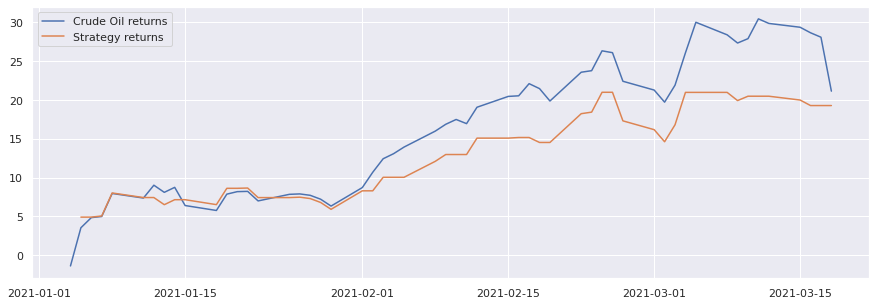

In [293]:
prices['cumReturns'] = 100*prices['closeReturn'].cumsum()
prices['cumStrategyReturns']= 100*(prices['closeReturn'] * prices['PredictedSignal'].shift(1)).cumsum()

plt.figure(figsize=(15,5))
plt.plot(prices['cumReturns'], label = 'Crude Oil returns')
plt.plot(prices['cumStrategyReturns'], label = 'Strategy returns')
plt.legend(loc='best')
plt.show()

In [294]:
print('Number of trades (buy) = ', (prices['PredictedSignal']==1).sum())
print('Number of trades (sell) = ', (prices['PredictedSignal']==0).sum())

Number of trades (buy) =  34
Number of trades (sell) =  20


In [295]:
"""
we will limit the number of orders by restricting ourselves to the number of positions on the market. 
we will apply diff() to the column signal:
"""
prices['Strategy'] = prices['PredictedSignal'].diff(2)
prices

,Settle,closeReturn,target,PredictedSignal,cumReturns,cumStrategyReturns,Strategy
Date,,,,,,,
2021-01-04,51.09,-0.013707,1.0,1,-1.370656,NaN,NaN
2021-01-05,53.60,0.049129,1.0,0,3.542242,4.912899,NaN
2021-01-06,54.30,0.013060,1.0,1,4.848213,4.912899,0.0
2021-01-07,54.38,0.001473,1.0,1,4.995542,5.060228,1.0
2021-01-08,55.99,0.029606,0.0,1,7.956190,8.020876,0.0
2021-01-11,55.66,-0.005894,1.0,0,7.366799,7.431485,-1.0
2021-01-12,56.58,0.016529,0.0,1,9.019691,7.431485,0.0
2021-01-13,56.06,-0.009191,1.0,1,8.100638,6.512432,1.0
2021-01-14,56.42,0.006422,0.0,0,8.742808,7.154601,-1.0


In [296]:
print('Number of trades (buy) = ', (prices.Strategy!=1).sum())
print('Number of trades (sell) = ', (prices.Strategy!=-1).sum())

Number of trades (buy) =  39
Number of trades (sell) =  39


 0.0    22
-1.0    15
 1.0    15
Name: Strategy, dtype: int64


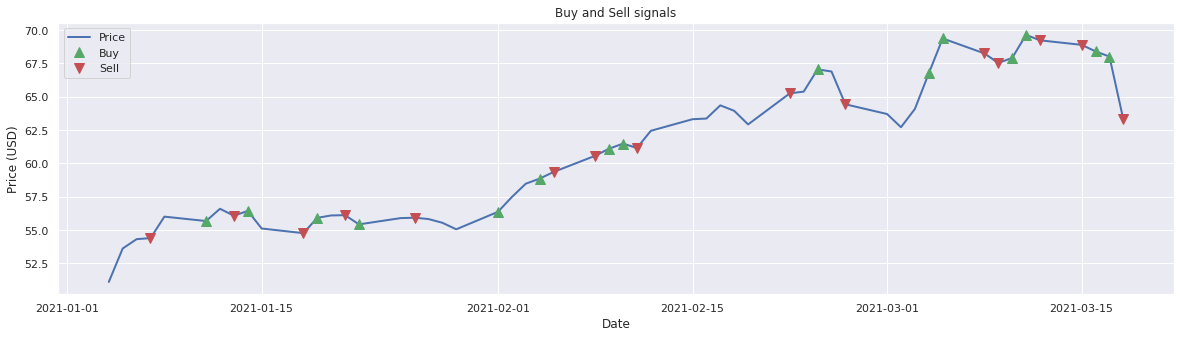

In [297]:
print(prices.Strategy.value_counts())

# Buy/Sell signals plot
buys = prices.loc[prices["Strategy"] == 1];
sells = prices.loc[prices["Strategy"] == -1];

# Plot
fig = plt.figure(figsize=(20, 5));
plt.plot(prices.index, prices['Settle'], lw=2., label='Price');

# Plot buy and sell signals
# up arrow when we buy one share
plt.plot(sells.index, prices.loc[sells.index]['Settle'], '^', markersize=10, color='g', lw=2., label='Buy');
# down arrow when we sell one share
plt.plot(buys.index, prices.loc[buys.index]['Settle'], 'v', markersize = 10, color='r', lw=2., label='Sell');
plt.ylabel('Price (USD)'); plt.xlabel('Date');
plt.title('Buy and Sell signals'); plt.legend(loc='best');
plt.show()

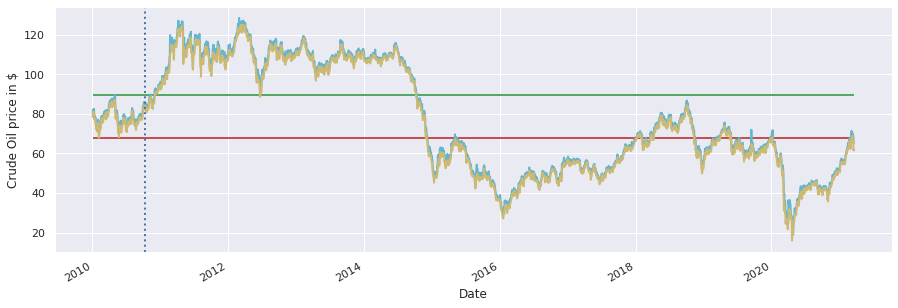

In [298]:
dq = BC.tail(620)
lows = BC['Low']
highs = BC['High']

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Crude Oil price in $')
highs.plot(ax=ax1, color='c', lw=2.)
lows.plot(ax=ax1, color='y', lw=2.)
plt.hlines(highs.head(200).max(),lows.index.values[0],
           lows.index.values[-1],linewidth=2, color='g')
plt.hlines(lows.head(200).min(),lows.index.values[0],
           lows.index.values[-1], linewidth=2, color='r')
plt.axvline(linewidth=2,color='b',x=lows.index.values[200],linestyle=':')
plt.show()

In [ ]:
#strategy_std = qq.cum_strategy_returns.std().np.sqrt(252)
# print('Sharpe Ratio:',qq.cum_returns.mean() / qq.cum_returns.std())

In [299]:
prices = prices.reset_index()
prices.tail()

,Date,Settle,closeReturn,target,PredictedSignal,cumReturns,cumStrategyReturns,Strategy
49,2021-03-12,69.22,-0.005888,0.0,1,29.837082,20.471345,1.0
50,2021-03-15,68.88,-0.004912,0.0,1,29.345895,19.980157,1.0
51,2021-03-16,68.39,-0.007114,0.0,0,28.634513,19.268775,-1.0
52,2021-03-17,68.00,-0.005703,0.0,0,28.064254,19.268775,-1.0
53,2021-03-18,63.28,-0.069412,1.0,1,21.123077,19.268775,1.0


In [304]:
class Portfolio:
    def __init__(self):
        self.lotA = 1
        self.lotB = 1
        self.contract = 1
        self.initialCash = 10000
        self.buy = (np.where(prices.Strategy == 1, 
                                        self.lotA * self.contract *prices.Settle, 0))
        self.sell = (np.where(prices.Strategy == (-1), 
                                        self.lotB * self.contract *prices.Settle, 0))
        
    def long_amt(self):
        self.buy = (np.where(prices.Strategy == 1,
                                     Portfolio().lotA * 
                                       Portfolio().contract *prices.Settle, 0))
        return self.buy
        
    def cashDelta(self):
        self.cashDelta = Portfolio().buy + Portfolio().sell
        return self.cashDelta
    
    def endBalance(self):
        self.endBalance = Portfolio().initialCash + Portfolio().cashDelta().cumsum()
        return self.endBalance
    
    def endPosition(self):
        self.endPosition = prices.Strategy.cumsum()
        return self.endPosition
        
p = Portfolio()
prices['Buy'] = p.buy
prices['Sell'] = p.sell
prices['cashDelta'] = p.cashDelta()
prices['endBalance'] = p.endBalance()
prices['endPosition'] = p.endPosition()
prices.loc[:, ['Date', 'Settle', 'Strategy','Buy', 'Sell', 
                 'cashDelta', 'endBalance', 'endPosition']].tail()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Date,Settle,Strategy,Buy,Sell,cashDelta,endBalance,endPosition
49,2021-03-12,69.22,1.0,69.22,0.00,69.22,11594.69,0.0
50,2021-03-15,68.88,1.0,68.88,0.00,68.88,11663.57,1.0
51,2021-03-16,68.39,-1.0,0.00,68.39,68.39,11731.96,0.0
52,2021-03-17,68.00,-1.0,0.00,68.00,68.00,11799.96,-1.0
53,2021-03-18,63.28,1.0,63.28,0.00,63.28,11863.24,0.0


In [302]:
prices['pnl'] = prices['endBalance'] + (prices.endPosition * prices.Settle * Portfolio().contract)
prices.loc[:, ['Date', 'Settle', 'endBalance', 'endPosition', 'pnl']].tail(10)

KeyError: 'EndBalance'

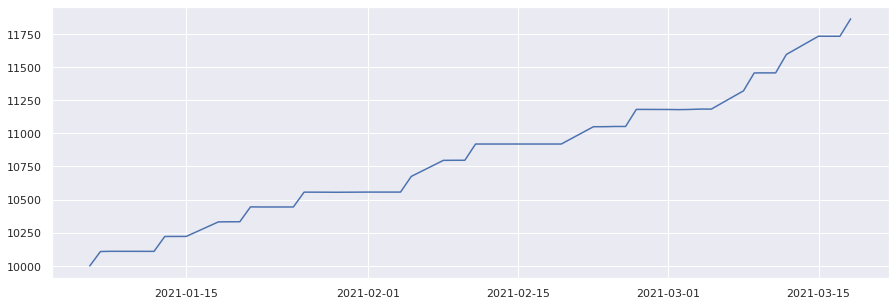

In [277]:
d = prices.set_index('Date')
plt.figure(figsize=(15,5))
plt.plot(d.pnl)